In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as mcolors
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.interpolate import Rbf, RBFInterpolator
import gstools as gs
from matplotlib import cm



data_file = "../../../data/one_day_data/2020/07/2020-07-27/3-30.csv"
df = pd.read_csv(data_file, index_col=0)
df.head()

,LON,LAT,hour-rain,AT1,RH1,SOL,WD1,WS1,PRS,SLP
Vlz-Bagbaguin_00174731,121.0009,14.7134,0.0,33.7,40.3,295.0,244.0,0.8,1006.7,1009.6
NagNayon_00181273,121.0285,14.7192,0.0,35.4,45.3,499.0,197.0,0.3,1003.8,1010.0
Sinegue_00181300,120.9319,14.4599,0.0,33.9,49.8,1001.0,352.0,0.9,1008.2,1009.9
DLSAU_00174722,120.9974,14.6705,0.0,34.5,43.7,883.0,298.0,0.3,1007.2,1009.6
ASTI_00173457,121.0721,14.6471,0.0,35.4,34.4,887.0,73.0,0.7,1001.8,1009.3


------------------------------ linear ------------------------------
[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]


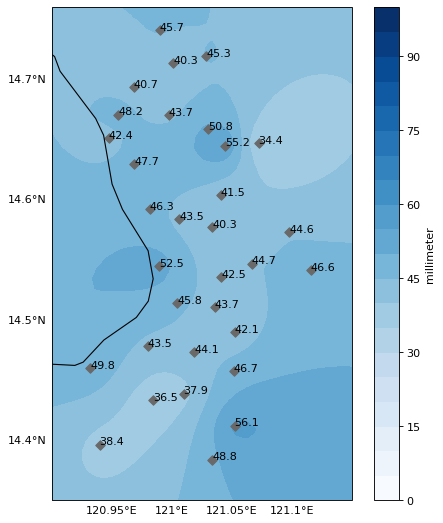

------------------------------ thin_plate_spline ------------------------------
[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]


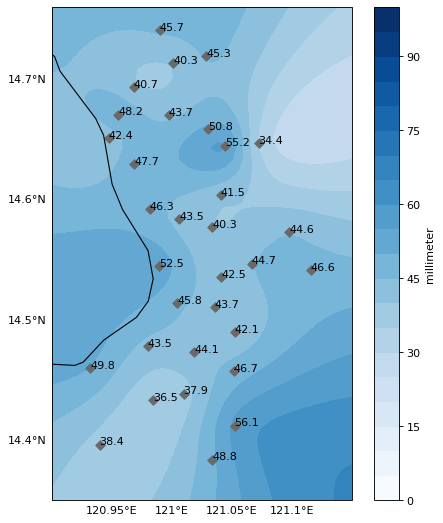

------------------------------ cubic ------------------------------
[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]


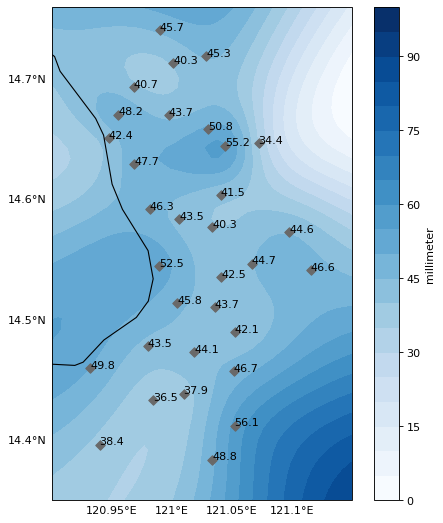

------------------------------ quintic ------------------------------
[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]


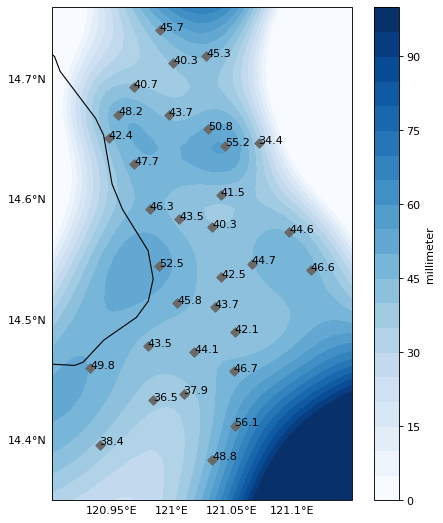

------------------------------ multiquadric ------------------------------
[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]


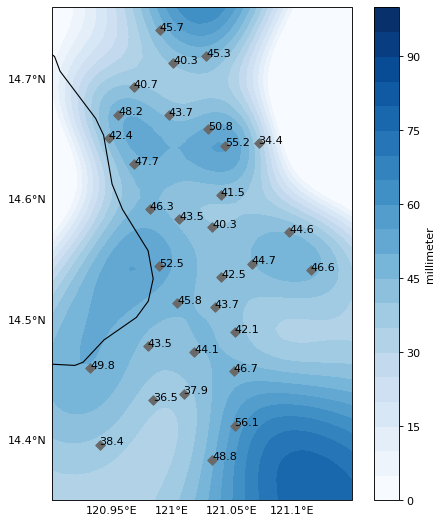

------------------------------ inverse_multiquadric ------------------------------
[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]


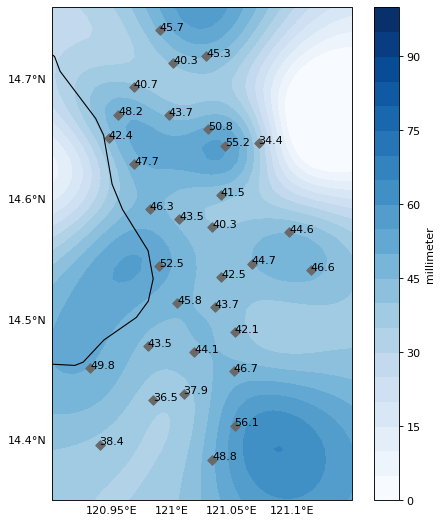

------------------------------ inverse_quadratic ------------------------------
[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]


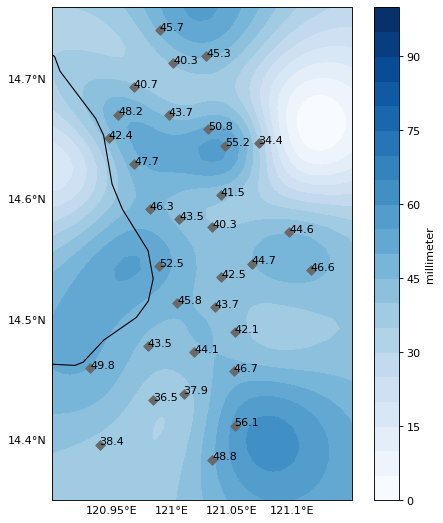

------------------------------ gaussian ------------------------------
[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]


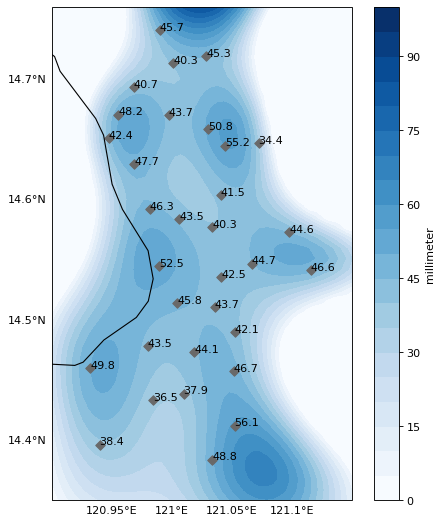

In [5]:
def rbf_test(kernel):
    print('-'*30, kernel, '-'*30)
    rbfi = RBFInterpolator(y=df[['LON','LAT']],d=df['RH1'], kernel=kernel, epsilon=10)
    grid_lon = np.round(np.linspace(120.90, 121.150, 50), decimals=3)
    grid_lat = np.round(np.linspace(14.350, 14.760, 50), decimals=3)
    xi, yi = np.meshgrid(grid_lon, grid_lat)
    xgrid = np.around(np.mgrid[120.90:121.150:50j, 14.350:14.760:50j], decimals=3)
    xfloat = xgrid.reshape(2, -1).T
    
    xmi, ymi = xfloat[:, 0], xfloat[:, 1]
    
    z1 = rbfi(xfloat)
    z1 = z1.reshape(50, 50)
    rain_data = np.where(z1 > 0, z1, 0)
    rain_data = np.where(rain_data > 100, 100, rain_data)
    
    fig = plt.figure(figsize=(7, 8), dpi=80)
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([120.90, 121.150, 14.350, 14.760])
    ax.add_feature(cfeature.COASTLINE)
    gl = ax.gridlines(draw_labels=True, alpha=0)
    gl.right_labels = False
    gl.top_labels = False

    clevs = [i for i in range(0, 101, 5)]
    print(clevs)
    cmap = cm.Blues
    norm = mcolors.BoundaryNorm(clevs, cmap.N)

    cs = ax.contourf(*xgrid, rain_data, clevs, cmap=cmap, norm=norm)
    cbar = plt.colorbar(cs, orientation='vertical')
    cbar.set_label('millimeter')
    ax.scatter(df['LON'], df['LAT'], marker='D', color='dimgrey')
    for i, val in enumerate(df['RH1']):
        ax.annotate(val, (df['LON'][i], df['LAT'][i]))
    plt.show()
    plt.close()
kernels = ['linear', 'thin_plate_spline', 'cubic', 'quintic', 'multiquadric', 'inverse_multiquadric', 'inverse_quadratic', 'gaussian']
for kernel in kernels:
    rbf_test(kernel)

------------------------------ multiquadric ------------------------------


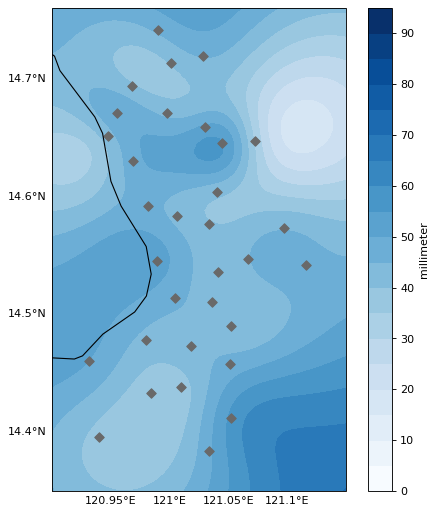

------------------------------ inverse ------------------------------


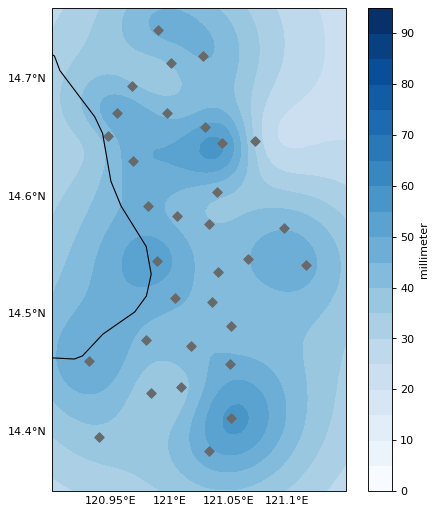

------------------------------ gaussian ------------------------------


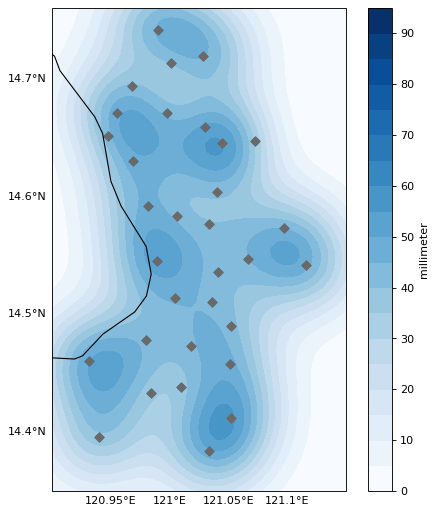

------------------------------ linear ------------------------------


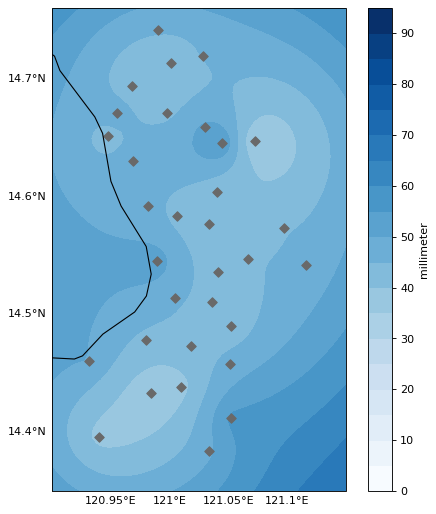

------------------------------ cubic ------------------------------


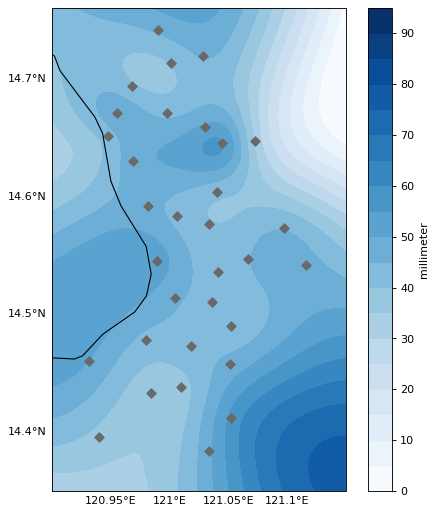

------------------------------ quintic ------------------------------


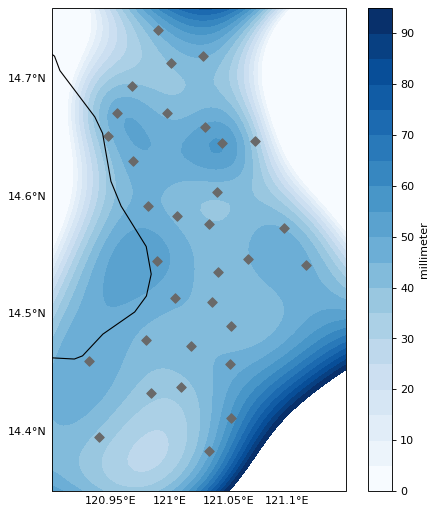

------------------------------ thin_plate ------------------------------


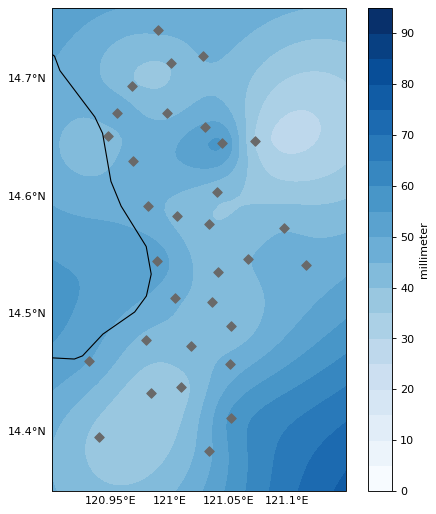

In [4]:
def rbf_test(func):
    print('-'*30, func, '-'*30)
    rbfi = Rbf(df['LON'], df['LAT'], df['RH1'], function=func)
    grid_lon = np.round(np.linspace(120.90, 121.150, 75), decimals=3)
    grid_lat = np.round(np.linspace(14.350, 14.760, 75), decimals=3)
    xi, yi = np.meshgrid(grid_lon, grid_lat)
    z1 = rbfi(xi, yi)
    rain_data = np.where(z1 > 0, z1, 0)
    rain_data = np.where(rain_data > 100, 100, rain_data)
    fig = plt.figure(figsize=(7, 8), dpi=80)
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([120.90, 121.150, 14.350, 14.760])
    ax.add_feature(cfeature.COASTLINE)
    gl = ax.gridlines(draw_labels=True, alpha=0)
    gl.right_labels = False
    gl.top_labels = False

    clevs = [i for i in range(0, 100, 5)]
    cmap = cm.Blues
    norm = mcolors.BoundaryNorm(clevs, cmap.N)

    cs = ax.contourf(xi, yi, rain_data, clevs, cmap=cmap, norm=norm)
    cbar = plt.colorbar(cs, orientation='vertical')
    cbar.set_label('millimeter')
    ax.scatter(df['LON'], df['LAT'], marker='D', color='dimgrey')
    plt.show()
    plt.close()
func_names = ['multiquadric', 'inverse', 'gaussian', 'linear', 'cubic', 'quintic', 'thin_plate']
for func in func_names:
    rbf_test(func)

---------------------------------------- Gaussian ----------------------------------------


/home/akira/anaconda3/envs/p-poteka/lib/python3.7/site-packages/gstools/covmodel/tools.py:525: AttributeWarning: Dimension 3 is not appropriate for this model.
  AttributeWarning,
/home/akira/anaconda3/envs/p-poteka/lib/python3.7/site-packages/gstools/covmodel/plot.py:156: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


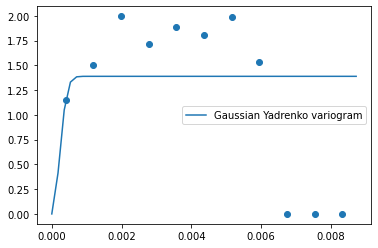

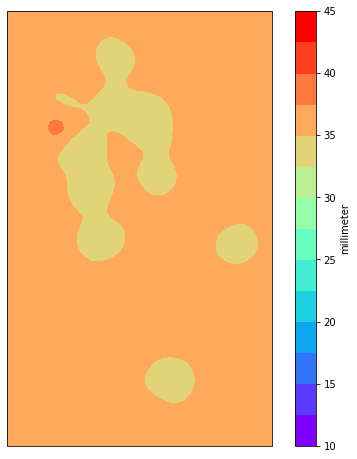

---------------------------------------- Exponential ----------------------------------------


/home/akira/anaconda3/envs/p-poteka/lib/python3.7/site-packages/gstools/covmodel/plot.py:156: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


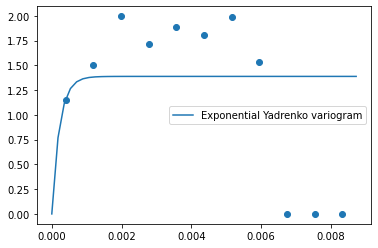

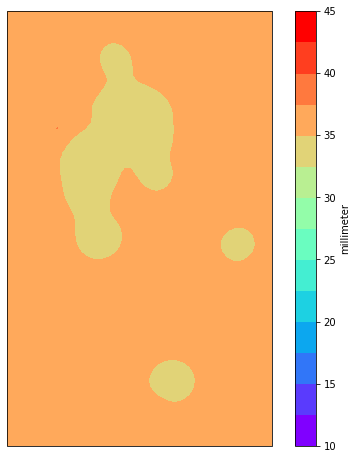

---------------------------------------- Matern ----------------------------------------


/home/akira/anaconda3/envs/p-poteka/lib/python3.7/site-packages/gstools/covmodel/plot.py:156: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


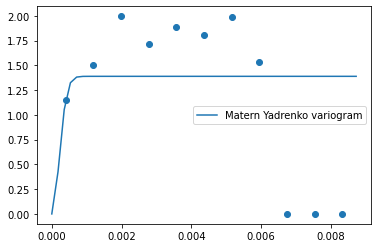

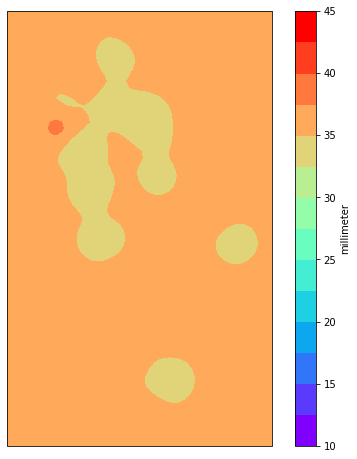

---------------------------------------- Stable ----------------------------------------


/home/akira/anaconda3/envs/p-poteka/lib/python3.7/site-packages/gstools/covmodel/plot.py:156: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


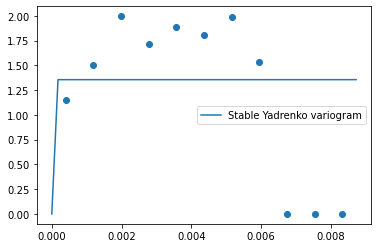

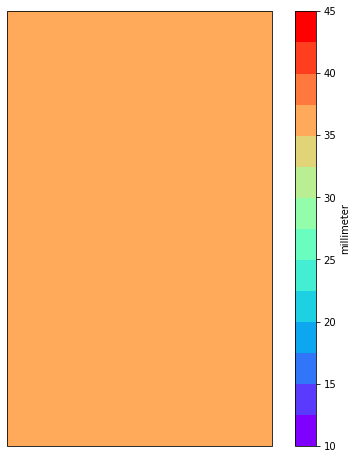

---------------------------------------- Rational ----------------------------------------


/home/akira/anaconda3/envs/p-poteka/lib/python3.7/site-packages/gstools/covmodel/plot.py:156: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


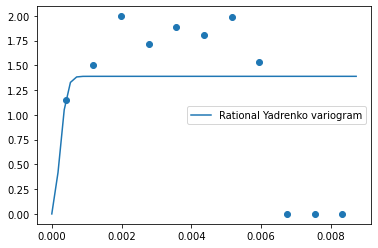

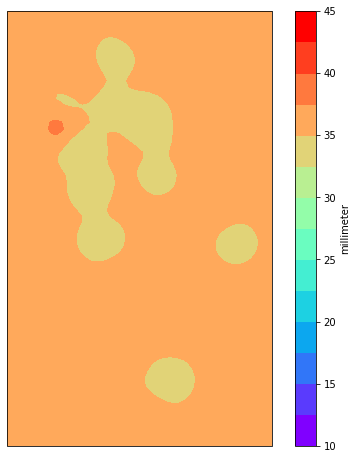

---------------------------------------- Cubic ----------------------------------------


/home/akira/anaconda3/envs/p-poteka/lib/python3.7/site-packages/gstools/covmodel/plot.py:156: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


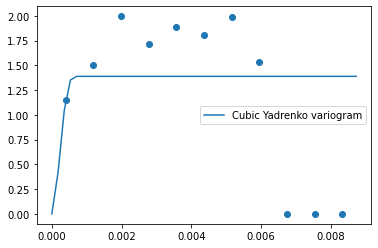

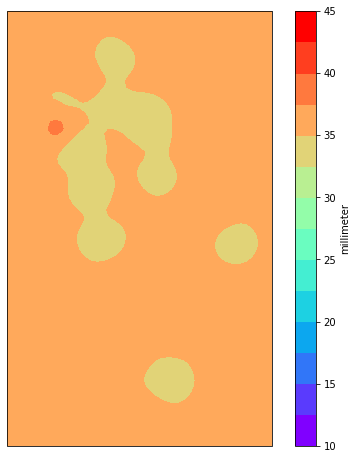

---------------------------------------- Linear ----------------------------------------


/home/akira/anaconda3/envs/p-poteka/lib/python3.7/site-packages/gstools/covmodel/plot.py:156: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


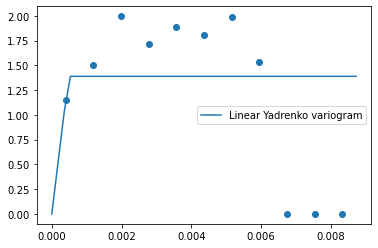

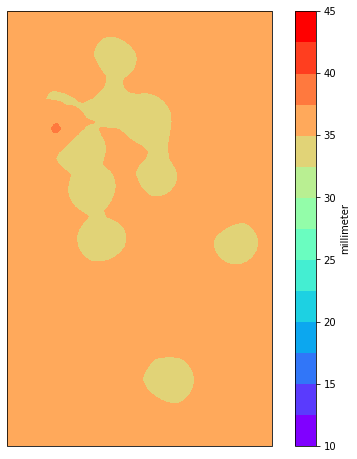

---------------------------------------- Circular ----------------------------------------


/home/akira/anaconda3/envs/p-poteka/lib/python3.7/site-packages/gstools/covmodel/plot.py:156: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


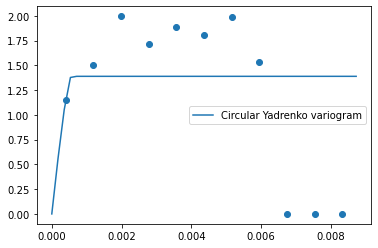

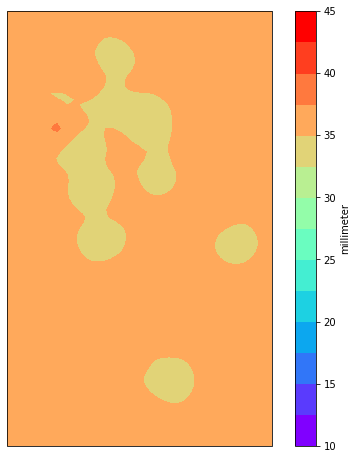

---------------------------------------- Spherical ----------------------------------------


/home/akira/anaconda3/envs/p-poteka/lib/python3.7/site-packages/gstools/covmodel/plot.py:156: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


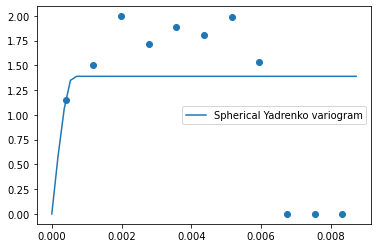

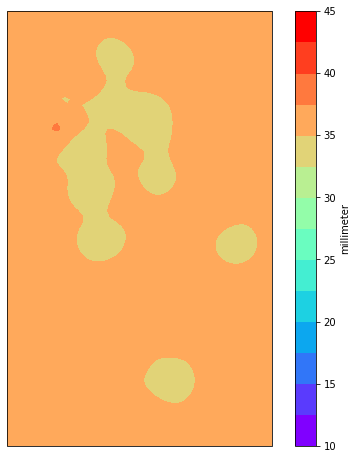

---------------------------------------- HyperShperical ----------------------------------------


/home/akira/anaconda3/envs/p-poteka/lib/python3.7/site-packages/gstools/covmodel/plot.py:156: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


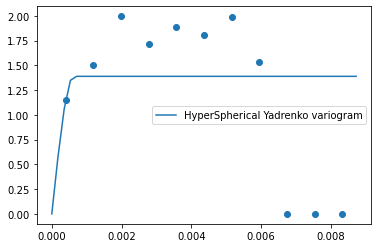

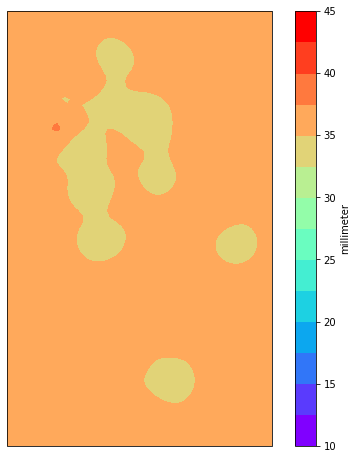

---------------------------------------- SuperSphetrical ----------------------------------------


/home/akira/anaconda3/envs/p-poteka/lib/python3.7/site-packages/gstools/covmodel/plot.py:156: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


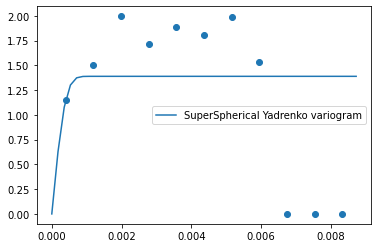

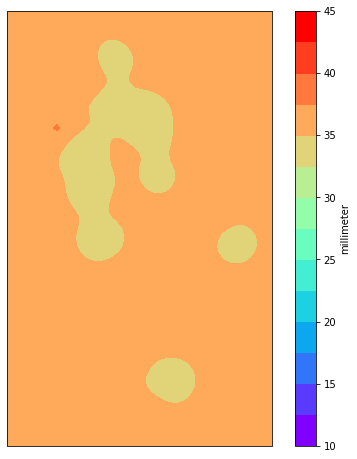

---------------------------------------- JBessel ----------------------------------------


/home/akira/anaconda3/envs/p-poteka/lib/python3.7/site-packages/gstools/covmodel/plot.py:156: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


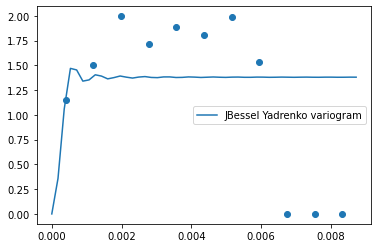

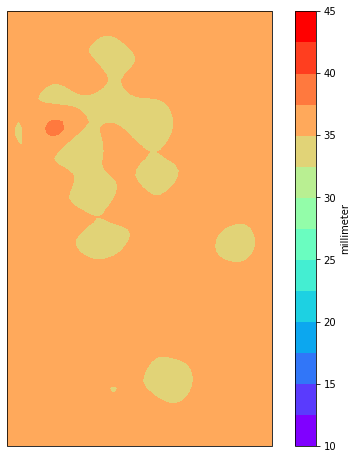

---------------------------------------- TPLSimple ----------------------------------------


/home/akira/anaconda3/envs/p-poteka/lib/python3.7/site-packages/gstools/covmodel/plot.py:156: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


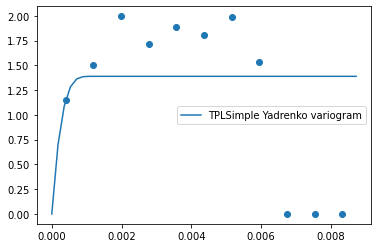

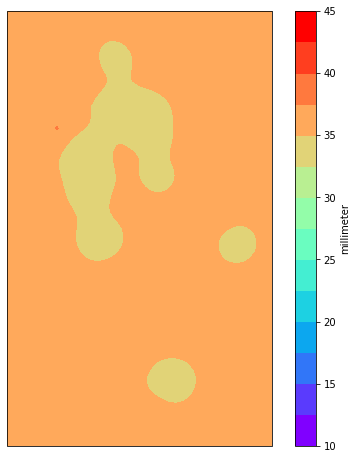

In [16]:
models = [gs.Gaussian(latlon=True, rescale=gs.EARTH_RADIUS, var=1, len_scale=1.0),
          gs.Exponential(latlon=True, rescale=gs.EARTH_RADIUS, var=1, len_scale=1.0),
          gs.Matern(latlon=True, rescale=gs.EARTH_RADIUS, var=1, len_scale=1.0),
          gs.Stable(latlon=True, rescale=gs.EARTH_RADIUS, var=1, len_scale=1.0),
          gs.Rational(latlon=True, rescale=gs.EARTH_RADIUS, var=1, len_scale=1.0),
          gs.Cubic(latlon=True, rescale=gs.EARTH_RADIUS, var=1, len_scale=1.0),
          gs.Linear(latlon=True, rescale=gs.EARTH_RADIUS, var=1, len_scale=1.0),
          gs.Circular(latlon=True, rescale=gs.EARTH_RADIUS, var=1, len_scale=1.0),
          gs.Spherical(latlon=True, rescale=gs.EARTH_RADIUS, var=1, len_scale=1.0),
          gs.HyperSpherical(latlon=True, rescale=gs.EARTH_RADIUS, var=1, len_scale=1.0),
          gs.SuperSpherical(latlon=True, rescale=gs.EARTH_RADIUS, var=1, len_scale=1.0),
          gs.JBessel(latlon=True, rescale=gs.EARTH_RADIUS, var=1, len_scale=1.0),
          gs.TPLSimple(latlon=True, rescale=gs.EARTH_RADIUS, var=1, len_scale=1.0)]
model_name = ['Gaussian', 'Exponential', 'Matern', 'Stable', 'Rational', 'Cubic', 'Linear', 'Circular', 'Spherical',
             'HyperShperical', 'SuperSphetrical', 'JBessel', 'TPLSimple']
for i in range(len(models)):
    print('-'*40, model_name[i], '-'*40)
    bins = gs.standard_bins((df['LAT'], df['LON']), max_dist=np.deg2rad(0.5), latlon=True)
    bin_c, vario = gs.vario_estimate((df['LAT'], df['LON']), df['AT1'], bins, latlon=True)
    model = models[i]
    model.fit_variogram(bin_c, vario, nugget=False)
    ax = model.plot("vario_yadrenko", x_max=bins[-1])
    ax.scatter(bin_c, vario)
    grid_lon = np.round(np.linspace(120.90, 121.150, 75), decimals=3)
    grid_lat = np.round(np.linspace(14.350, 14.760, 75), decimals=3)
    #z1, ss1 = np.round(OK.execute("grid", grid_lon, grid_lat), decimals=3)
    OK_gs = gs.krige.Ordinary(model, [df['LAT'], df['LON']], df['AT1'], exact=True)
    z1 = OK_gs.structured([grid_lat, grid_lon])
    z1 = z1[0]
    xintrip, yintrip = np.meshgrid(grid_lon, grid_lat)
    rain_data = np.where(z1 > 0, z1, 0)
    fig = plt.figure(figsize=(8, 8))
    proj = ccrs.Stereographic(central_latitude=14.555, central_longitude=121.025)
    ax = fig.add_subplot(1, 1, 1, projection=proj)
    ax.coastlines()

    clevs = [10, 12.5, 15, 17.5, 20, 22.5, 25, 27.5, 30, 32.5, 35, 37.5, 40, 42.5, 45]
    cmap = cm.rainbow
    norm = mcolors.BoundaryNorm(clevs, cmap.N)

    cs = ax.contourf(xintrip, yintrip, rain_data, clevs, cmap=cmap, norm=norm)
    cbar = plt.colorbar(cs, orientation='vertical')
    cbar.set_label('millimeter')
    plt.show()
    plt.close()

In [4]:
df['AT1']

Vlz-Bagbaguin_00174731    28.3
NagNayon_00181273         25.2
Sinegue_00181300          34.3
DLSAU_00174722            28.9
ASTI_00173457             28.6
MM-SanAndres_00173459     33.6
Vlz-DRRMO_00174734        31.7
UniManila_00181287        32.4
TUP-Taguig_00181272       32.7
MM-Catmon_00174723        33.3
E-Library_00181274        33.4
RAVE_00181290             32.7
Anabu-1B_00181286         35.7
MM-Tapayan_00173458       32.4
CMuntilupa_00181294       33.1
NAMRIA_00181292           33.6
NBP_00181293              34.4
PAGASA_00174735           29.8
LP-Elias_00174724         34.8
Bayanan-ES_00181283       32.4
LP-SciHS_00174726         34.3
CentPark_00181288         33.8
MM-Libertad_00181289      32.6
LP-DrFelimon_00174733     34.8
CAAP_00174729             34.4
GH-Subdiv_00181291        33.7
C3Bldg_00181284           34.5
MM-Balut_00174728         32.7
Xavier-Sch_00181285       31.7
DOST_00174730             32.9
Vlz-Punturin_00174725     29.4
QC-SciHS_00181271         29.9
Name: AT

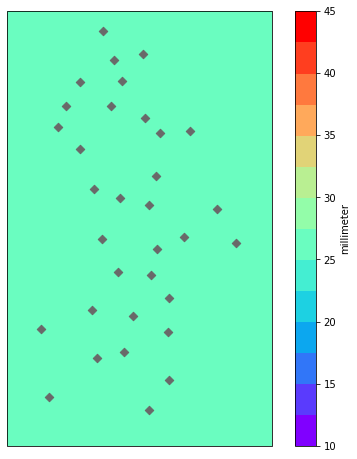

In [5]:
path = '../../../data/one_day_data/2020/07/2020-07-08/18-10.csv'
df = pd.read_csv(path, index_col=0)
bins = gs.standard_bins((df['LAT'], df['LON']), max_dist=np.deg2rad(0.5), latlon=True)
bin_c, vario = gs.vario_estimate((df['LAT'], df['LON']), df['AT1'], bins, latlon=True)
model = gs.Exponential(latlon=True, rescale=gs.EARTH_RADIUS, var=1, len_scale=1.0)
model.fit_variogram(bin_c, vario, nugget=False)
grid_lon = np.round(np.linspace(120.90, 121.150, 75), decimals=3)
grid_lat = np.round(np.linspace(14.350, 14.760, 75), decimals=3)
#z1, ss1 = np.round(OK.execute("grid", grid_lon, grid_lat), decimals=3)
OK_gs = gs.krige.Ordinary(model, [df['LAT'], df['LON']], df['AT1'], exact=True)
z1 = OK_gs.structured([grid_lat, grid_lon])
z1 = z1[0]
xintrip, yintrip = np.meshgrid(grid_lon, grid_lat)
rain_data = np.where(z1 > 0, z1, 0)
fig = plt.figure(figsize=(8, 8))
proj = ccrs.Stereographic(central_latitude=14.555, central_longitude=121.025)
ax = fig.add_subplot(1, 1, 1, projection=proj)
ax.coastlines()

clevs = [10, 12.5, 15, 17.5, 20, 22.5, 25, 27.5, 30, 32.5, 35, 37.5, 40, 42.5, 45]
cmap = cm.rainbow
norm = mcolors.BoundaryNorm(clevs, cmap.N)

cs = ax.contourf(xintrip, yintrip, rain_data, clevs, cmap=cmap, norm=norm)
cbar = plt.colorbar(cs, orientation='vertical')
cbar.set_label('millimeter')
ax.scatter(df['LON'], df['LAT'], marker='D', color='dimgrey')

In [6]:
df['AT1']

Vlz-Bagbaguin_00174731    26.4
NagNayon_00181273         25.7
Sinegue_00181300          28.9
DLSAU_00174722            24.7
ASTI_00173457             25.6
MM-SanAndres_00173459     27.7
Vlz-DRRMO_00174734        26.4
UniManila_00181287        27.2
Vlz-Ugong_00174727        25.3
TUP-Taguig_00181272       27.3
MM-Catmon_00174723        26.6
E-Library_00181274        27.9
RAVE_00181290             25.6
Anabu-1B_00181286         29.0
MM-Tapayan_00173458       26.7
CMuntilupa_00181294       28.9
NAMRIA_00181292           27.9
NBP_00181293              25.7
PAGASA_00174735           24.8
LP-Elias_00174724         29.2
Bayanan-ES_00181283       28.6
LP-SciHS_00174726         27.0
CentPark_00181288         27.0
MM-Libertad_00181289      28.7
LP-DrFelimon_00174733     28.8
CAAP_00174729             28.5
GH-Subdiv_00181291        27.4
C3Bldg_00181284           27.9
MM-Balut_00174728         27.4
Xavier-Sch_00181285       27.4
DOST_00174730             26.7
Vlz-Punturin_00174725     26.0
QC-SciHS